# Video Games Sales

## Load Data

In [1]:
# import required libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load dataset
vg_df = pd.read_csv('vgsales.csv')

In [3]:
# first five rows
vg_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Data Preprocessing

In [4]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# check for missing values
vg_df.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [6]:
# drop missing values
vg_df.dropna(how='any', inplace=True)

In [7]:
vg_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [8]:
print(vg_df.shape)

(16291, 11)


For this dataset we need to do some typecasting. The following columns are nominal categories and need to be converted to categorical variables:
- Platform
- Genre
- Publisher

The 'Year' column also needs to be converted from float to int dtype.

In [9]:
vg_df['Year'] = vg_df['Year'].astype(int)
vg_df['Platform'] = vg_df['Platform'].astype('category')
vg_df['Genre'] = vg_df['Genre'].astype('category')
vg_df['Publisher'] = vg_df['Publisher'].astype('category')

In [10]:
vg_df.dtypes

Rank               int64
Name              object
Platform        category
Year               int64
Genre           category
Publisher       category
NA_Sales         float64
EU_Sales         float64
JP_Sales         float64
Other_Sales      float64
Global_Sales     float64
dtype: object

In [11]:
vg_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Data Visualization

Note: all sales are in $ millions.

[Text(0.5, 1.0, 'North American Sales by Genre')]

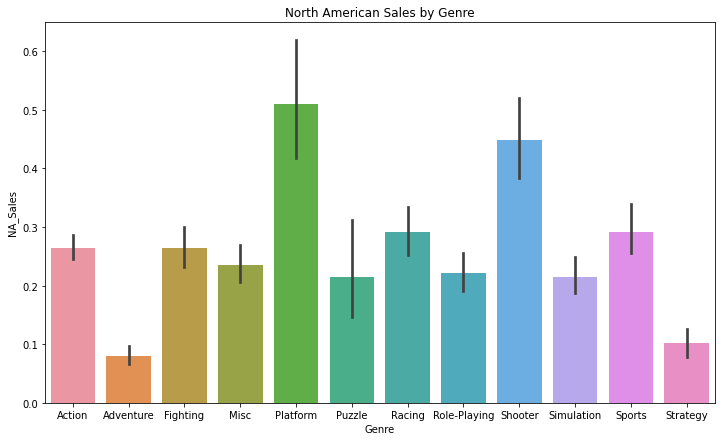

In [12]:
# North American Sales by Genre
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=vg_df,
            x='Genre', y='NA_Sales')
ax.set(title='North American Sales by Genre')

[Text(0.5, 1.0, 'European Sales by Genre')]

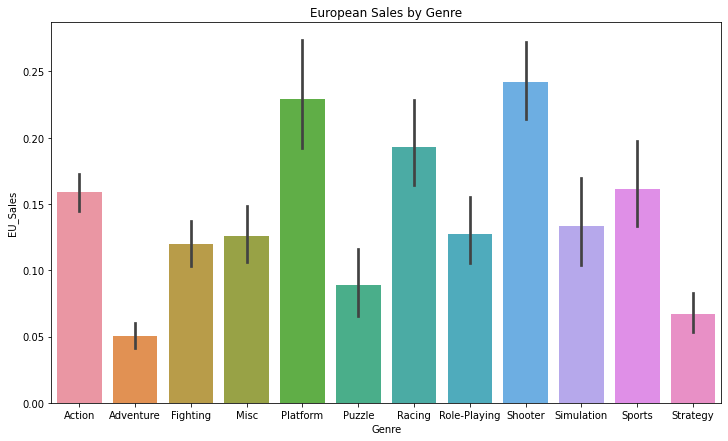

In [13]:
# European Sales by Genre
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=vg_df,
            x='Genre', y='EU_Sales')
ax.set(title='European Sales by Genre')

[Text(0.5, 1.0, 'Japanese Sales by Genre')]

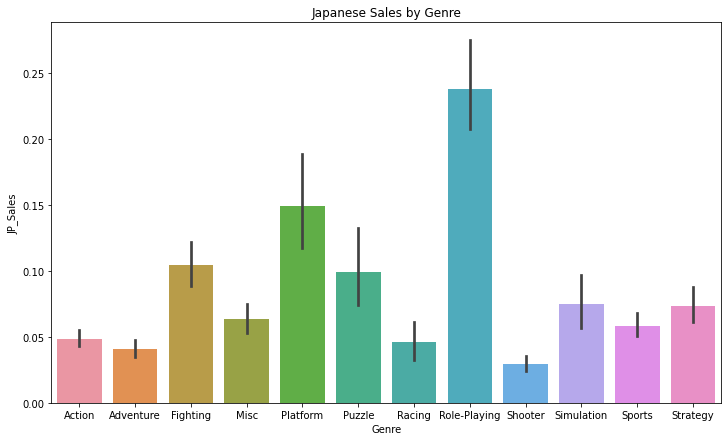

In [14]:
# Japanese Sales by Genre
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=vg_df,
            x='Genre', y='JP_Sales')
ax.set(title='Japanese Sales by Genre')

[Text(0.5, 1.0, 'Global Sales by Genre')]

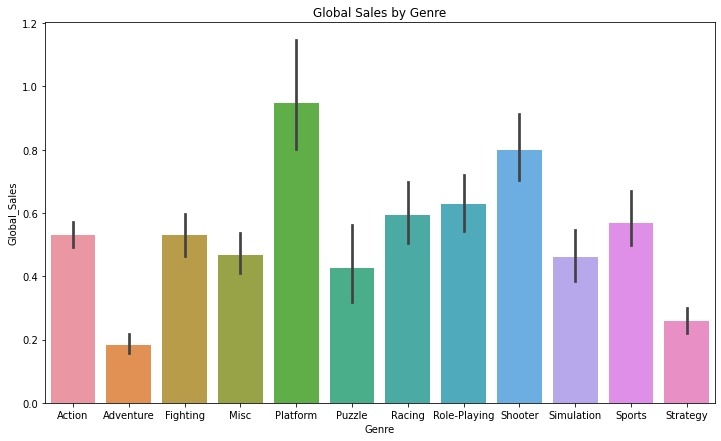

In [15]:
# Global Sales by Genre
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data=vg_df,
            x='Genre', y='Global_Sales')
ax.set(title='Global Sales by Genre')

The Sales by Region plots show how customers of different regions have different tastes when it comes to the Genre of video games they prefer. 
- The North American Sales indicate that Platform games were most popular. 
- European Sales indicate that Shooter games were the most popular.
- Japanese Sales indicate that Role-playing games were the most bought games.
- Least favourite for the North American and European markets were Adventure games. However, Shooter games were the least bought in the Japanese market although they were among the top 2 most popular genre of games bought in North American and European markets! Therefore the tastes of customers in different regions appear to be vastly different. If a new Shooter game was to be launched in Japanese markets first before other markets the marketing team might come to wrong conclusion about the demand for the game in North American and European markets. 

<AxesSubplot:>

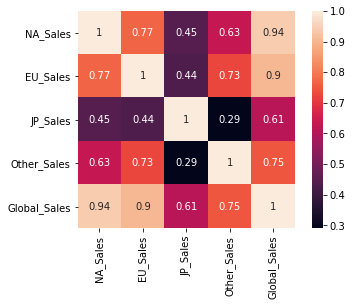

In [16]:
# plot correlation matrix
corrmat = vg_df[['NA_Sales', 'EU_Sales',
                 'JP_Sales', 'Other_Sales',
                 'Global_Sales']].corr()
sns.heatmap(corrmat, annot=True, square=True)

The correlation matrix shows how North American and European Sales are fairly correlated. However, Japanese Sales are not well correlated to North American and European markets.

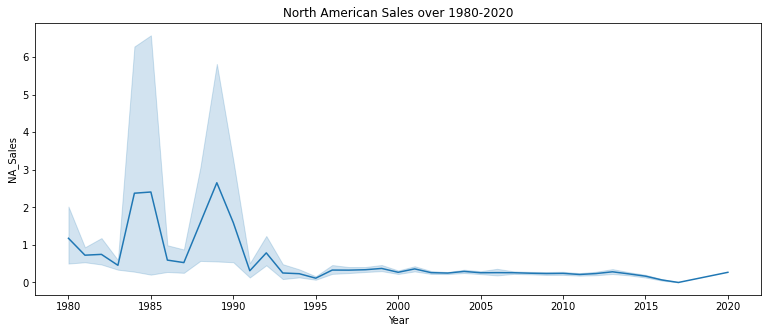

In [17]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.lineplot(data=vg_df,
              x='Year', y='NA_Sales', ax=ax)
ax.set(title='North American Sales over 1980-2020');

It appears that sales in North America currently are not as high as the peaks in mid-to-late 1980s.

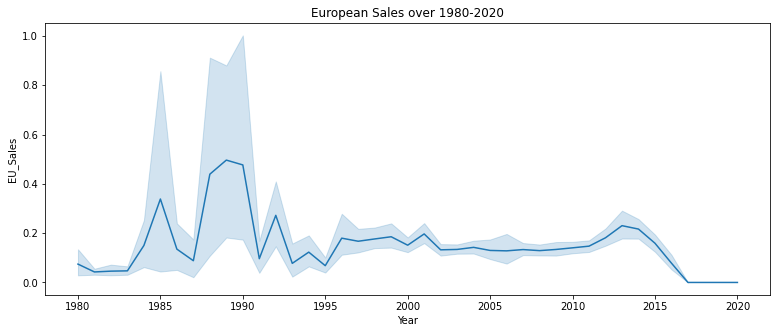

In [18]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.lineplot(data=vg_df,
              x='Year', y='EU_Sales', ax=ax)
ax.set(title='European Sales over 1980-2020');

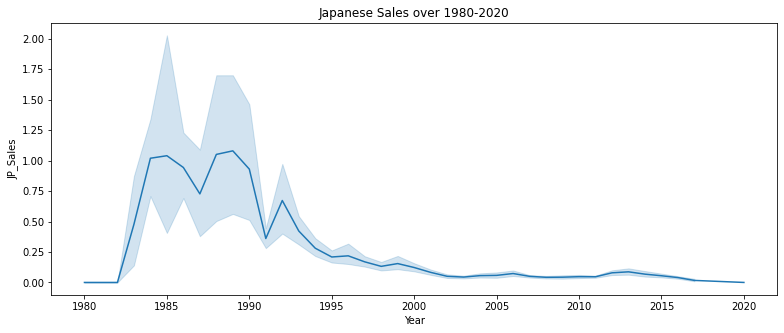

In [19]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.lineplot(data=vg_df,
              x='Year', y='JP_Sales', ax=ax)
ax.set(title='Japanese Sales over 1980-2020');

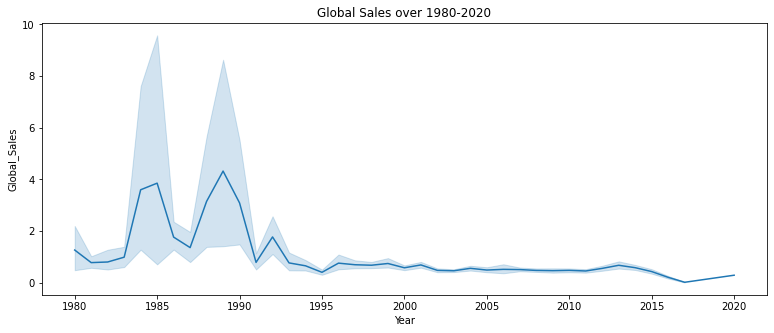

In [20]:
fig, ax = plt.subplots(figsize=(13, 5))
sns.lineplot(data=vg_df,
              x='Year', y='Global_Sales', ax=ax)
ax.set(title='Global Sales over 1980-2020');

We see that Video game sales are globally no where near the peaks of the mid-to-late 1980s.

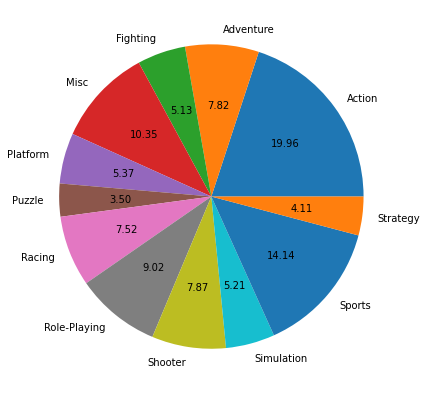

In [21]:
# market share of games by Genre
fig, ax = plt.subplots(figsize=(7, 7))
genre_size = vg_df.groupby('Genre').size()
genre_size.plot.pie(autopct='%.2f')
ax.set_ylabel("");

There are a host of other questions we can ask about this dataset like "What were the number of games sold in the year 2010 by genre?"

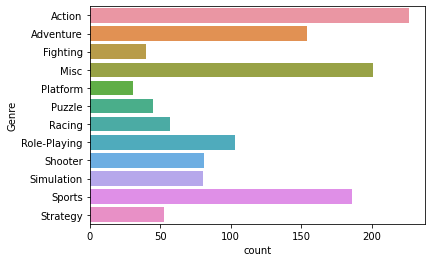

In [22]:
sns.countplot(data=vg_df.query('Year == 2010'),
                                y='Genre');

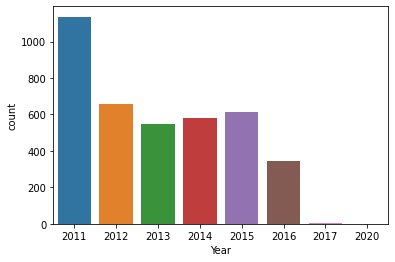

In [23]:
sns.countplot(data=vg_df.query('Year > 2010'),
                                x='Year');

Groupby tables can also inform our analysis of cross-sectional sales by Region, per Year, etc.

In [24]:
group_genre = vg_df.groupby('Genre')[['NA_Sales', 'EU_Sales',
                 'JP_Sales', 'Other_Sales',
                 'Global_Sales']].mean()
group_genre.reset_index(inplace=True)
group_genre

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,0.265078,0.158868,0.048800,0.056881,0.529942
1,Adventure,0.080008,0.050031,0.040808,0.013108,0.184137
2,Fighting,0.264043,0.119617,0.104246,0.043289,0.531160
3,Misc,0.235421,0.125605,0.063268,0.043843,0.468488
4,Platform,0.509703,0.229314,0.149314,0.058869,0.947577
5,Puzzle,0.214053,0.088632,0.099439,0.021877,0.424930
6,Racing,0.291371,0.192906,0.046212,0.062596,0.593273
7,Role-Playing,0.222109,0.127599,0.238293,0.040395,0.628456
8,Shooter,0.448643,0.242161,0.029782,0.079485,0.800468
9,Simulation,0.214363,0.133278,0.074929,0.036981,0.459882


In [25]:
group_year = vg_df.groupby('Year')[['NA_Sales', 'EU_Sales',
                 'JP_Sales', 'Other_Sales',
                 'Global_Sales']].mean()
group_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,1.176667,0.074444,0.000000,0.013333,1.264444
1981,0.726087,0.042609,0.000000,0.006957,0.777609
1982,0.747778,0.045833,0.000000,0.008611,0.801667
1983,0.456471,0.047059,0.476471,0.008235,0.987647
1984,2.377143,0.150000,1.019286,0.050000,3.597143
1985,2.409286,0.338571,1.040000,0.065714,3.852857
1986,0.595238,0.135238,0.943333,0.091905,1.765238
1987,0.528750,0.088125,0.726875,0.012500,1.358750
1988,1.591333,0.439333,1.050667,0.066000,3.148000


This was just a preliminary simple EDA on the sales of video games. There's a lot more to ask and more insights to generate depending on what we're looking for. This may not be a full analysis but it gives some ideas for what to look into depending on our needs.